In [2]:
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('./res/computer.dat', sep='\s+')

In [4]:
data.isnull().any()

V1A      False
V1B      False
V1C      False
V2A      False
V2B      False
V2C      False
V2D      False
V2E      False
V2F      False
V3A      False
V3B      False
V3C      False
V4A      False
V4B      False
V4C      False
V4D      False
V4E      False
V5A      False
V5B      False
SEX      False
ALTER    False
HERKU    False
FB       False
dtype: bool

Данные не имеют null значений.

Для проведения кластерного анализа нам не нужны будут колонки, означающий код факультета, пол студента, его возраст и регион.

In [5]:
data = data.drop(['FB', 'SEX', 'ALTER', 'HERKU', 'V5A', 'V5B'], axis=1)

Статистические характеристики данных

In [6]:
data.describe()

,V1A,V1B,V1C,V2A,V2B,V2C,V2D,V2E,V2F,V3A,V3B,V3C,V4A,V4B,V4C,V4D,V4E
count,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000
mean,2.288479,3.971429,3.793548,4.295853,4.429493,4.765899,4.811060,4.630415,4.816590,3.250691,2.340092,4.649770,3.293088,3.128111,4.437788,4.835023,4.588018
std,1.029413,1.096840,1.110897,1.066096,1.043278,0.738090,0.612197,0.886968,0.648943,1.260312,1.078773,0.840023,1.310192,1.356001,0.993081,0.561256,0.937554
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,2.000000,2.000000,5.000000,2.000000,2.000000,4.000000,5.000000,5.000000
50%,2.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,2.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000
75%,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
X = data.iloc[:].values

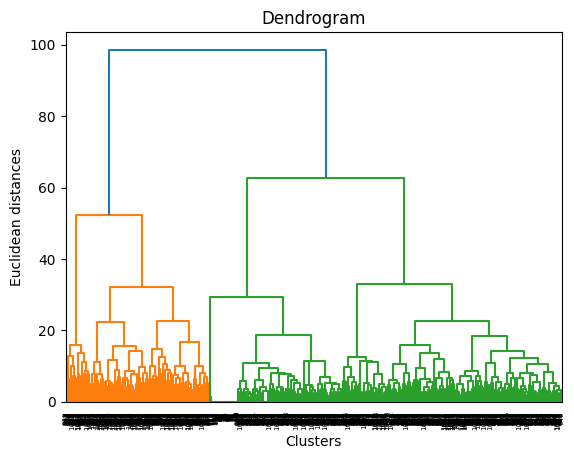

In [8]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.xlabel('Clusters')
plt.show()

In [9]:
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

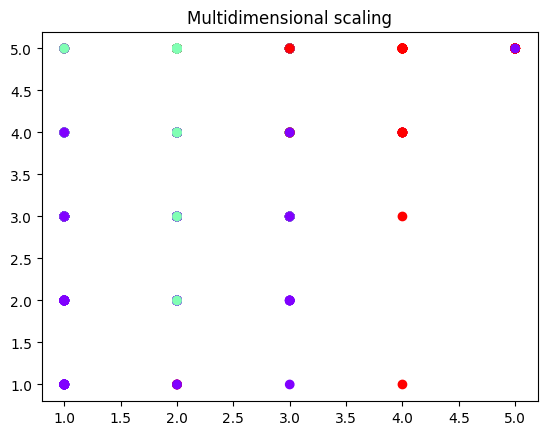

In [10]:
plt.title('Multidimensional scaling')
plt.scatter(X[:, 0], X[:, 1], c = hc.labels_, cmap='rainbow')
plt.show()

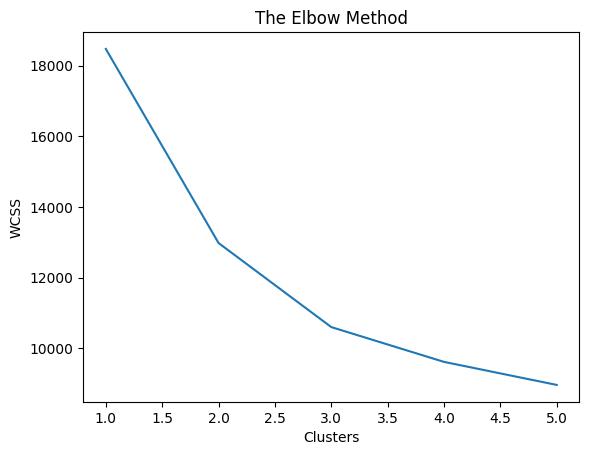

In [11]:
wcss = []
for i in range(1, 6): 
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=3, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('The Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init=3 ,random_state = 42)
y_kmeans = kmeans.fit_predict(X)

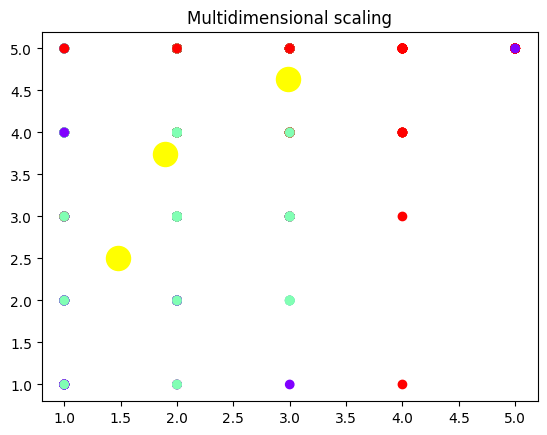

In [13]:
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Multidimensional scaling')
plt.show()